In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("./training.1600000.processed.noemoticon.csv",header=None, names=cols)
df.drop(['id', 'date', 'query_string', 'user'], axis=1, inplace=True)

In [12]:
from pprint import pprint
df['pre_clean_len'] = [len(t) for t in df.text]

data_dict = {
    'sentiment':{
        'type': df.sentiment.dtype,
        'description': 'sentiment class: 0 = negative, 1 = positive',
    },
    'text':{
        'type': df.text.dtype,
        'description': 'tweet text',
    },
    'pre_clean_len':{
        'type': df.pre_clean_len.dtype,
        'description': 'length of tweet before cleaning',
    },
    'dataset_shape': df.shape
}

pprint(data_dict)
print("Average tweet length pre-cleaning:", np.average(df['pre_clean_len']), "characters.")

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'length of tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class: 0 = negative, 1 = positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}
Average tweet length pre-cleaning: 74.041768125 characters.


In [19]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

def text_cleaner(text):
    temp = BeautifulSoup(text, 'lxml').get_text() # removes html encoding
    temp.replace("'", "") # avoids removing contractions
    temp = temp.lower() # lowercase
    temp = re.sub(r'@[A-Za-z0-9_]+', '', temp) # removes mentions
    temp = re.sub(r'https?://\S+', '', temp) # removes urls (http/https)
    temp = re.sub(r'www.\S+', '', temp) # removes urls (www.)
    temp = re.sub(r'[&,.]', ' ', temp) # removes all non letters
    temp = re.sub(r'[^a-z\s]+', '', temp)
    # tokenizes and removes stopwords
    temp = temp.split()
    temp = [w for w in temp if w not in stopwords]
    cleaned = " ".join(word for word in temp)
    cleaned = cleaned.strip()
    return cleaned

clean_tweets = []
for i in range(len(df)):
    if ((i+1) % 10000 == 0): print("%d tweets have been cleaned" % (i+1))
    clean_t = text_cleaner(df.text[i])
    clean_tweets.append(clean_t)

c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


10000 tweets have been cleaned
20000 tweets have been cleaned
30000 tweets have been cleaned
40000 tweets have been cleaned
50000 tweets have been cleaned
60000 tweets have been cleaned
70000 tweets have been cleaned
80000 tweets have been cleaned
90000 tweets have been cleaned
100000 tweets have been cleaned
110000 tweets have been cleaned
120000 tweets have been cleaned
130000 tweets have been cleaned
140000 tweets have been cleaned
150000 tweets have been cleaned
160000 tweets have been cleaned
170000 tweets have been cleaned
180000 tweets have been cleaned
190000 tweets have been cleaned
200000 tweets have been cleaned
210000 tweets have been cleaned
220000 tweets have been cleaned
230000 tweets have been cleaned
240000 tweets have been cleaned
250000 tweets have been cleaned
260000 tweets have been cleaned
270000 tweets have been cleaned
280000 tweets have been cleaned
290000 tweets have been cleaned
300000 tweets have been cleaned
310000 tweets have been cleaned
320000 tweets hav

In [27]:
# dropping null entries (which have occurred due to cleaning)
clean_df = pd.DataFrame(clean_tweets, columns=['text'])
clean_df['target'] = df.sentiment
clean_df = np.all(clean_df.text
for i, text in enumerate(clean_df.text):
    if len(text) <= 1: print(i, text)
clean_df.dropna(inplace=True)
clean_df.reset_index(drop=True,inplace=True)
clean_df.info()

208 
249 
282 
398 
430 
555 
614 
1011 
1014 
1063 
1231 
1421 
1468 
1486 
1641 
2589 
2898 
3040 
3467 
3997 
4201 
4233 
4377 
4508 
4721 
5284 
6058 
6258 
6419 
6446 
7170 
7349 
7360 
7683 
7840 
7872 
8131 u
8399 
8709 
8838 
9072 
9556 
9599 
9756 
10149 
10363 
10379 
10625 
10862 
11113 
11367 
11820 
12037 
12110 
12674 
13232 
13411 
13546 
14470 
14516 
14943 
15679 
16145 
16342 
16417 
16727 
16734 
16803 
17071 
17364 
17422 
17433 
18048 
18333 
18375 
18796 
18950 
19154 
19267 
19445 
19592 
19833 
20870 
21465 
22305 
22362 
22383 
22467 
23108 
23116 
23884 
24397 
24700 u
24712 
24773 
24993 
25293 
25704 
26048 
26113 
26291 
26481 
26910 
27114 
27140 
28787 
28855 
28898 
28961 
28996 
29695 
29873 u
29900 
30563 
31079 
31350 
31403 
31778 
32224 
32313 
32851 
34170 
34289 
34317 
34744 
34948 
35179 
35879 
36065 
36429 
36879 
37280 
37400 
37539 
37614 
37615 
37805 
39345 
39512 
39521 
39679 
39704 
40259 
40402 
40840 
41195 
41730 
41938 
41974 
42189

In [45]:
# note just setting 'target' to df.sentiment actually mislabels some of them oops
clean_df = pd.DataFrame(clean_tweets, columns=['text'])
clean_df['target'] = df.sentiment
clean_df.to_csv('clean_tweets.csv', encoding='utf-8')

In [61]:
clean_with_stopwords_df = pd.DataFrame(clean_tweets_with_stopwords, columns=['text'])
clean_with_stopwords_df['target'] = df.sentiment
clean_with_stopwords_df.to_csv('clean_tweets_with_stopwords.csv', encoding='utf-8')

LogisticRegression() 

Validation result for 10000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 78.36%
model is 28.28% more accurate than null accuracy
train and test time: 94.72s
--------------------------------------------------------------------------------
Validation result for 20000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.00%
model is 28.92% more accurate than null accuracy
train and test time: 101.20s
--------------------------------------------------------------------------------
Validation result for 30000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.11%
model is 29.04% more accurate than null accuracy
train and test time: 92.93s
--------------------------------------------------------------------------------
Validation result for 40000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.45%
model is 29.38% more accurate than null accuracy
train and test time: 92.96s
--------------------------------------------------------------------------------
Validation result for 50000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.48%
model is 29.41% more accurate than null accuracy
train and test time: 96.71s
--------------------------------------------------------------------------------
Validation result for 60000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.47%
model is 29.40% more accurate than null accuracy
train and test time: 92.20s
--------------------------------------------------------------------------------
Validation result for 70000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.55%
model is 29.47% more accurate than null accuracy
train and test time: 95.14s
--------------------------------------------------------------------------------
Validation result for 80000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.63%
model is 29.56% more accurate than null accuracy
train and test time: 97.39s
--------------------------------------------------------------------------------
Validation result for 90000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.54%
model is 29.46% more accurate than null accuracy
train and test time: 93.61s
--------------------------------------------------------------------------------
Validation result for 100000 features


c:\Users\Frank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


null accuracy: 50.08%
accuracy score: 79.57%
model is 29.49% more accurate than null accuracy
train and test time: 96.12s
--------------------------------------------------------------------------------


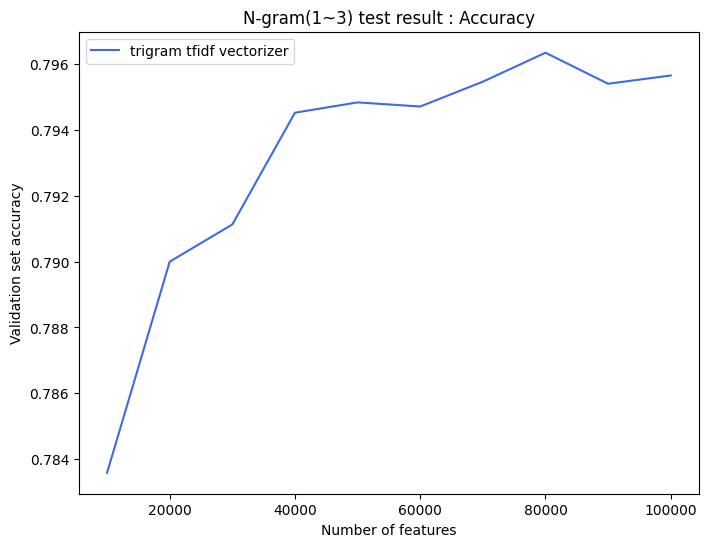

In [63]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time

my_df = pd.read_csv('clean_tweets.csv', index_col=0)
x = my_df.text
y = my_df.target
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=42)

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    null_accuracy = len(x_test[y_test == 0])/len(x_test) if len(x_test[y_test == 0])/len(x_test) > 0.5 else 1 - len(x_test[y_test == 0])/len(x_test)
    # if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
    #     null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    # else:
    #     null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

# cvec = CountVectorizer()
tvec = TfidfVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print(classifier, "\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

# feature_result_ugt = nfeature_accuracy_checker()
# feature_result_bgt = nfeature_accuracy_checker(ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(ngram_range=(1, 3))

nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
# nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
# nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
# plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
# plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
# plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
# plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
# plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [1]:
import tweepy
import os
from dotenv import load_dotenv

load_dotenv()

consumer_key = os.getenv('API_KEY')
consumer_secret = os.getenv('API_KEY_SECRET')
access_token = os.getenv('ACCESS_TOKEN')
access_token_secret = os.getenv('ACCESS_TOKEN_SECRET')
bearer_token = os.getenv('BEARER_TOKEN')

client = tweepy.Client(bearer_token)
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth,wait_on_rate_limit=True)
# api = tweepy.API(auth)

search_word = 'tesla' 
date_since = '2023-01-01'

# tweets = tweepy.search_recent_tweets(api.search_tweets, q = search_word, lang ='en', since = date_since).items(100)
tweets = client.search_recent_tweets(query=search_word)
# tweet_details = [[tweet.geo,tweet.text,tweet.user.screen_name,tweet.user.location] for tweet in tweets]
# tweet_details = [tweet.text for tweet in tweets]
for tweet in tweets.data:
    print(tweet.text)

RT @elonmusk: Wait for it …
@borentar @11thJeff @elonmusk Sick lies require strong language, Law of Nature. Why would you complain about "strong language" but not complaining lies meant to damage Tesla &amp; Elon?
RT @gurgavin: $TSLA TESLA Q1 DELIVERY NUMBERS WILL BE OUT IN LESS THAN 24 HOURS 

ANALYST ESTIMATES 

TOTAL DELIVERIES -&gt;  421,164

MODEL S…
@Tesla https://t.co/uAdA36ltjl
RT @elonmusk: Wait for it …
@Tesla April Fools!
@elonmusk Yeah, it can stop before colliding with an obstacle, how does it fair when the obstacle doesn't stop? Say an oncoming Tesla that crosses into the opposite lane due to avoiding a deer in the road?
RT @StockMKTNewz: Best performing S&amp;P 500 stocks from Q1

Nvidia $NVDA +90.1%
Facebook $META +76.1%
Tesla $TSLA +68.4%
Warner Bros. Discove…
RT @elonmusk: Wait for it …
😂 https://t.co/c7bIQmPCGY


In [5]:
# def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
#     null_accuracy = len(x_test[y_test == 0])/len(x_test) if len(x_test[y_test == 0])/len(x_test) > 0.5 else 1 - len(x_test[y_test == 0])/len(x_test)
#     # if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
#     #     null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
#     # else:
#     #     null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
#     t0 = time()
#     sentiment_fit = pipeline.fit(x_train, y_train)
#     y_pred = sentiment_fit.predict(x_test)
#     train_test_time = time() - t0
#     accuracy = accuracy_score(y_test, y_pred)
#     print("null accuracy: {0:.2f}%".format(null_accuracy*100))
#     print("accuracy score: {0:.2f}%".format(accuracy*100))
#     if accuracy > null_accuracy:
#         print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
#     elif accuracy == null_accuracy:
#         print("model has the same accuracy with the null accuracy")
#     else:
#         print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
#     print("train and test time: {0:.2f}s".format(train_test_time))
#     print("-"*80)
#     return accuracy, train_test_time

# def nfeature_accuracy_checker(vectorizer=tvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
#     result = []
#     print(classifier, "\n")
#     for n in n_features:
#         vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
#         checker_pipeline = Pipeline([
#             ('vectorizer', vectorizer),
#             ('classifier', classifier)
#         ])
#         print("Validation result for {} features".format(n))
#         nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
#         result.append((n,nfeature_accuracy,tt_time))
#     return result

def sentiment_analyzer_maker(vectorizer, num_features, ngram_range, classifier, train_df):
    vectorizer.set_params(max_features=num_features, ngram_range=ngram_range)
    sentiment_analyzer = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', classifier)
    ])
    sentiment_analyzer = sentiment_analyzer.fit(train_df.text, train_df.target)
    return sentiment_analyzer

lr = LogisticRegression(max_iter = 10)
searched_tweets = client.search_recent_tweets(query=search_word, max_results=100)
tweets_to_analyze = []
for tweet in searched_tweets.data:
    tweets_to_analyze.append(text_cleaner(tweet.text))
sentiment_analyzer = sentiment_analyzer_maker(tvec, 80000, (1,3), lr, my_df)

NameError: name 'LogisticRegression' is not defined

In [4]:
def sentiment_analyzer_applier(sentiment_analyzer, tweets_to_analyze):
    predicted_sentiments = sentiment_analyzer.predict(tweets_to_analyze)
    print(predicted_sentiments)
    print(sum(predicted_sentiments)/len(predicted_sentiments))
    print((sum(predicted_sentiments)/len(predicted_sentiments))/4)

sentiment_analyzer_applier(sentiment_analyzer, tweets_to_analyze)

NameError: name 'sentiment_analyzer' is not defined